In [1]:
from qiskit import *
import timeit
import matplotlib.pyplot as pyplot
import math

In [2]:
def crCircuit(size, rep):
    qr = QuantumRegister(size)
    cr = ClassicalRegister(size)
    circuit = QuantumCircuit(qr, cr)
    # circuit.h(qr)
    for i in range(rep):
        for i in range(len(qr)):
            if i%3==1:
                circuit.t(qr[i])
            if i%3==0:
                circuit.t(qr[i])
                if i + 2 < len(qr):
                    circuit.t(qr[i+2])
                    circuit.ccx(qr[i], qr[i+1], qr[i+2])
        
        for i in range(len(qr)):          
            if i%3==2 and i+1 < len(qr):
                circuit.cx(qr[i], qr[i+1])
        circuit.barrier()
    circuit.barrier()
    circuit.t(qr)
    circuit.s(qr)
    circuit.measure(qr, cr)
    return circuit

In [3]:
def simulate(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend = simulator, shots = 1024).result()
    return result

In [4]:
def testTime(bits, rep):
    time = []
    for i in range(bits):
        circuit = crCircuit(i + 1, rep)
        start = timeit.default_timer()
        simulate(circuit)
        time.append(timeit.default_timer() - start)
    return time

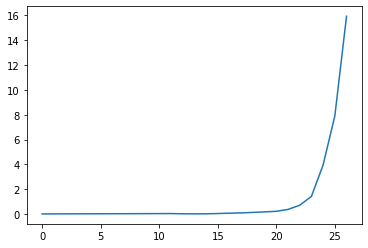

In [11]:
time = testTime(27, 1)
pyplot.plot(range(27), time)

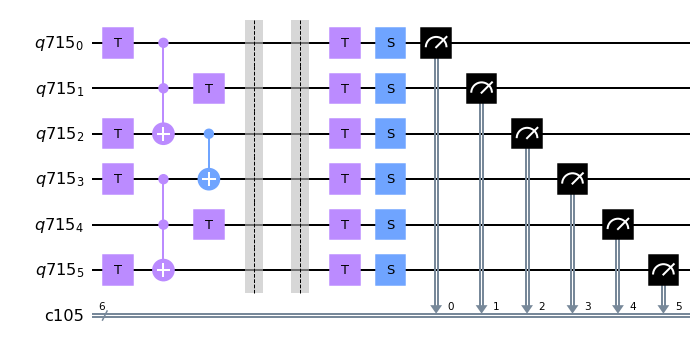

In [10]:
crCircuit(6, 1).draw(output='mpl')

In [46]:
def testRep(bits, rep):
    time = []
    for i in range(rep):
        circuit = crCircuit(bits, i + 1)
        start = timeit.default_timer()
        simulate(circuit)
        time.append(timeit.default_timer() - start)
    return time

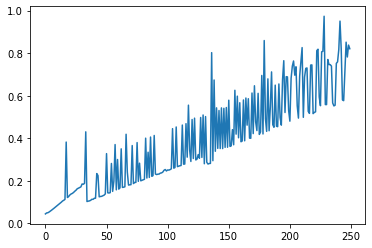

In [52]:
reptime = testRep(9, 250)
pyplot.plot(range(250), reptime)

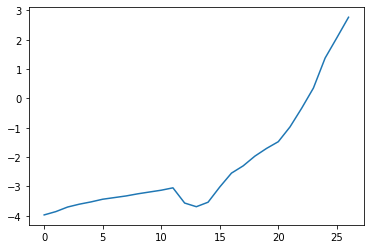

In [18]:
pyplot.plot(range(27), list(map(math.log, time)))

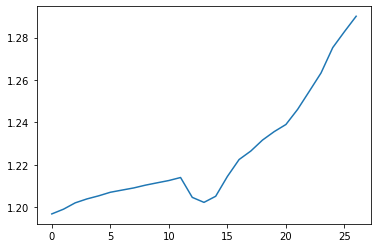

In [22]:
pyplot.plot(range(27), list(map((lambda x: (x+10)**(1. / 10)), map(math.log, time))))

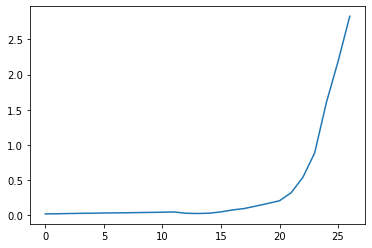

In [55]:
pyplot.plot(range(27), list(map((lambda x: math.log(x + 1)), time)))

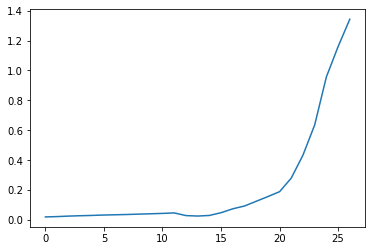

In [54]:
pyplot.plot(range(27), list(map((lambda x: math.log(x + 1)), map((lambda x: math.log(x + 1)), time))))

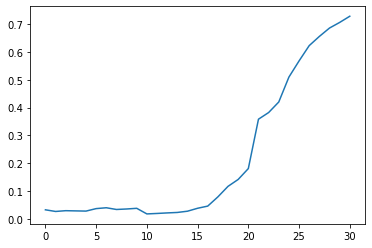

In [12]:
pyplot.plot(range(31), list(map((lambda x: math.log(math.log(math.log(math.log(x + 1) + 1) + 1) + 1)), time)))

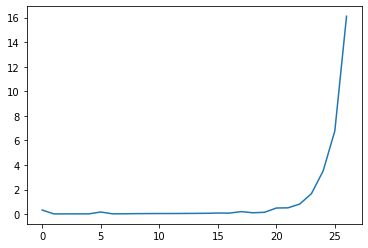

In [5]:
time = testTime(27, 1)
pyplot.plot(range(27), time)

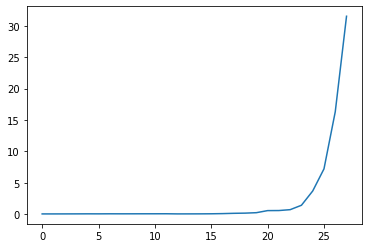

In [6]:
time = testTime(28, 1)
pyplot.plot(range(28), time)

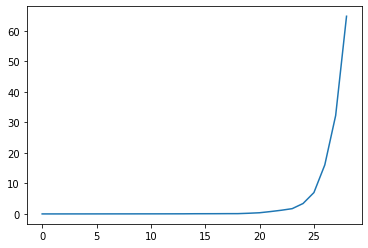

In [7]:
time = testTime(29, 1)
pyplot.plot(range(29), time)

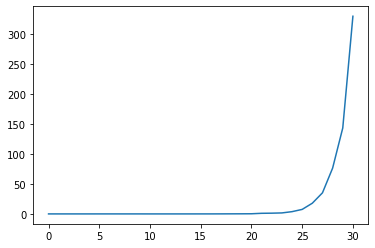

In [10]:
time = testTime(31, 1)
pyplot.plot(range(31), time)

In [13]:
circuit = crCircuit(31, 1)
simulate(circuit)

KeyboardInterrupt: 